<a href="https://colab.research.google.com/github/fahmidjobbi/TP-COLLAB/blob/main/NLP_Clean_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/reddit_posts.csv')
df

,Title,Post Text,Subreddit
0,VVTokens: Financial Services More Accessible,The​ ​Token​ ​to Make Electronic Financial Ser...,startup
1,We just raised USD 30M to make Contra the plat...,https://www.reddit.com/r/startups/comments/lqp...,startup
2,I built a website that teaches anyone who has ...,I've been working with all kinds of early-stag...,startup
3,"We made $2,5M with content marketing",This is a true story!\n\nThe backbone of our c...,startup
4,After more than a year of design & coding we l...,Logology ([https://www.logology.co](https://ww...,startup
...,...,...,...
25175,Adding r/baseball as a default community for t...,The baseball postseason is already underway! A...,announcements
25176,Sunsetting Secret Santa and Reddit Gifts,Today is a difficult one:. 2021 will be the la...,announcements
25177,New addition to site-wide rules regarding the ...,Hello All—\n\nWe want to let you know that we ...,announcements
25178,"Debate, dissent, and protest on Reddit",Hey everyone–\n\nThe pandemic has been extreme...,announcements


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25180 entries, 0 to 25179
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      25180 non-null  object
 1   Post Text  25180 non-null  object
 2   Subreddit  25180 non-null  object
dtypes: object(3)
memory usage: 590.3+ KB


In [ ]:
df.describe().transpose()

,count,unique,top,freq
Title,25180,2508,Here’s What Happened Last Week on Social Media...,50
Post Text,25180,2518,The​ ​Token​ ​to Make Electronic Financial Ser...,10
Subreddit,25180,5,family,9810


In [ ]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data



Count and percentage of missing values for the columns:


,Count,Percentage
Title,0,0.0
Post Text,0,0.0
Subreddit,0,0.0


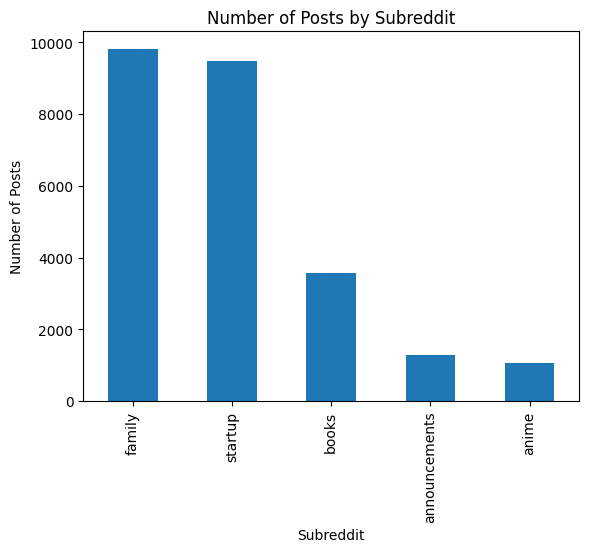

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of posts in each subreddit
counts = df['Subreddit'].value_counts()

# Plot a bar chart of the counts
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)

# Set the chart title and axis labels
ax.set_title('Number of Posts by Subreddit')
ax.set_xlabel('Subreddit')
ax.set_ylabel('Number of Posts')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Percentage of each Topic ')

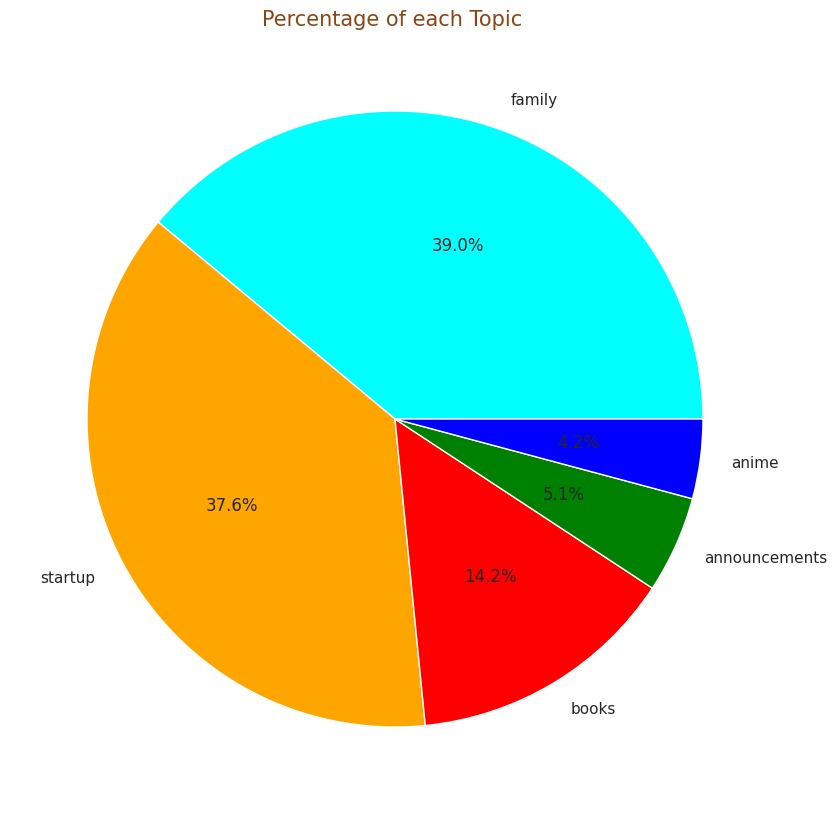

In [ ]:




#graphique circulaire de Categorie
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
labels=df.Subreddit.value_counts().index
colors=["cyan","orange","red","green","blue"]
sizes=df.Subreddit.value_counts().values
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Percentage of each Topic ",color="saddlebrown",fontsize=15)





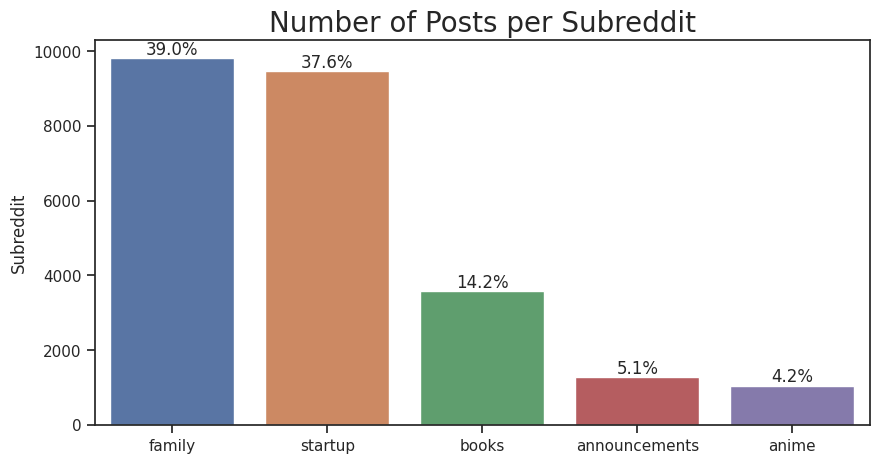

In [ ]:
sns.set(style="ticks")
plt.figure(figsize=(10,5))
total = float(len(df))
p = df['Subreddit'].value_counts()
ax = sns.barplot(x=p.index, y=p)
plt.title('Number of Posts per Subreddit', fontsize=20)
for i, v in enumerate(p):
    percentage = '{:.1f}%'.format(100 * v/total)
    ax.text(i, v+100, percentage, ha='center')
plt.show()


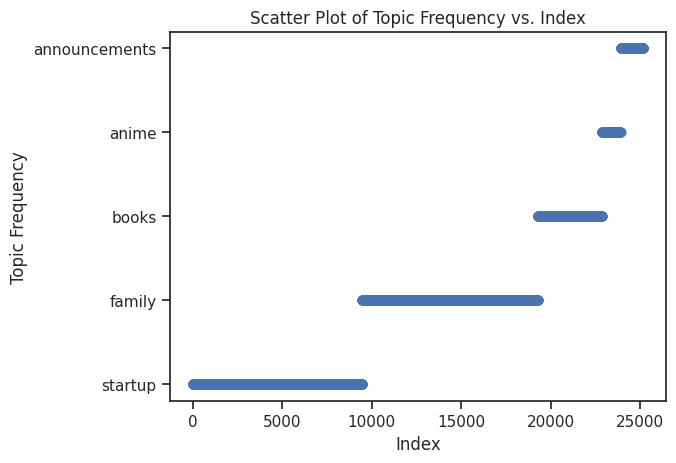

In [ ]:
import matplotlib.pyplot as plt

# assuming your dataset is stored in a pandas DataFrame called 'df'
x = df.index.values  # or any other variable you want to use as x-axis
y = df['Subreddit']  # frequency or count of your topic/keyword

plt.scatter(x, y)
plt.title('Scatter Plot of Topic Frequency vs. Index')
plt.xlabel('Index')
plt.ylabel('Topic Frequency')
plt.show()


In [ ]:
import plotly.express as px

# create a dataframe with the topic counts
topic_counts = df['Subreddit'].value_counts().reset_index()
topic_counts.columns = ['Subreddit', 'Count']

# create a treemap chart
fig = px.treemap(topic_counts,
                 path=['Subreddit'],
                 values='Count',
                 color='Count',
                 color_continuous_scale='Viridis',
                 title='Topic Proportions')
fig.show()


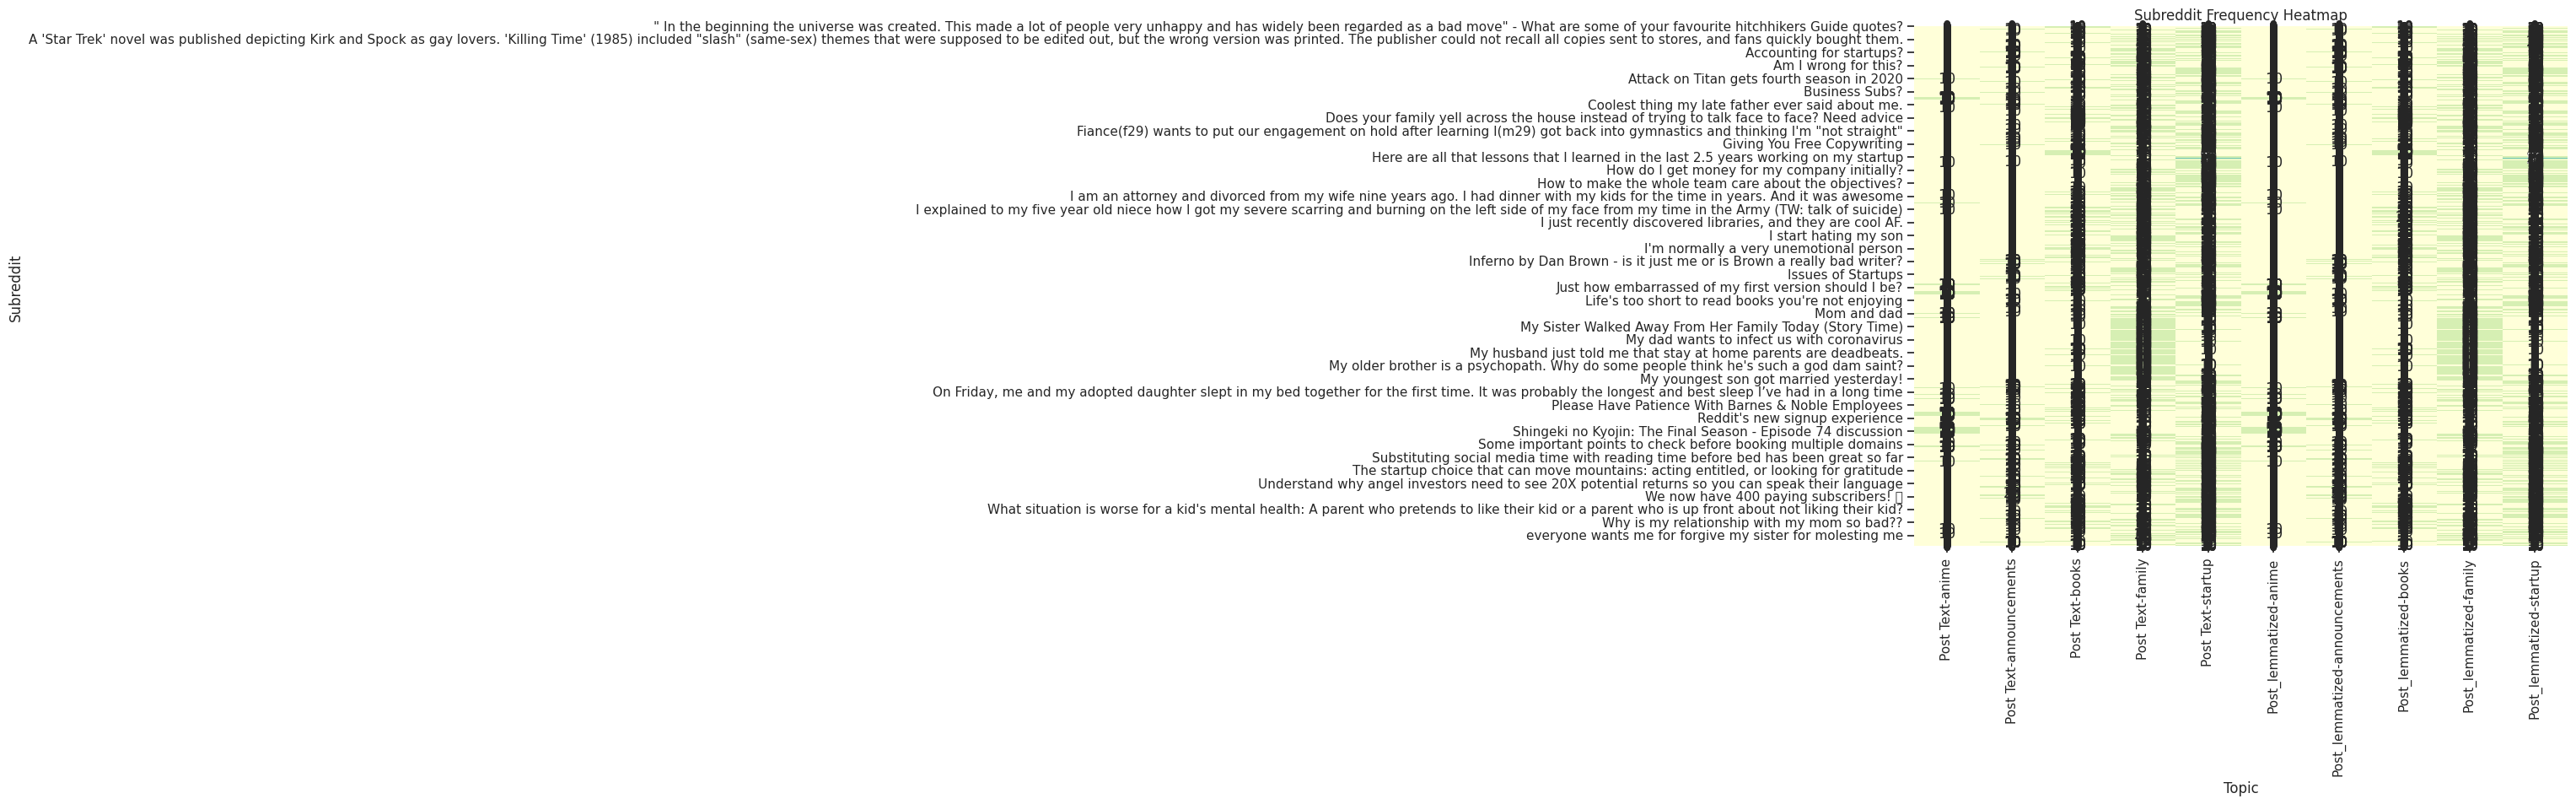

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create a pivot table of the frequency of each subreddit by topic
pivot_table = pd.pivot_table(df, index='Title', columns='Subreddit', aggfunc=len, fill_value=0)

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', cbar=False)
plt.title('Subreddit Frequency Heatmap')
plt.xlabel('Topic')
plt.ylabel('Subreddit')
plt.show()


In [ ]:
# Common data handling libraries
import os
import string
import pandas as pd
import numpy as np
import glob
import pickle

# Gensim for LDA
import gensim

# NLTK for test processing
import nltk
nltk.download('stopwords')

# spacy for Lemmatization
import spacy

# Visualization
import matplotlib.pyplot as plt

# Deep learning modeling
import keras

# Model evaluation metrics
import sklearn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(data):

    # convert to lower case
    data = [word.lower() for word in data.split()]

    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    # remove punctuation from each word
    data = [word.translate(table) for word in data]

    # remove tokens with numbers in them
    data = [word for word in data if word.isalpha()]

    # remove stopwords
    data = [word for word in data if word not in nltk.corpus.stopwords.words('english')]

    return data

data_caption=[]
data_caption = list(df['Post Text'].apply(lambda x : clean_text(x)))
data_caption[:5]

[['make',
  'electronic',
  'financial',
  'services',
  'accessible',
  'affordable',
  'initial',
  'coin',
  'offering',
  'launches',
  'december',
  'edt',
  'vvtoken',
  'intends',
  'issue',
  'two',
  'versions',
  'cards',
  'one',
  'individuals',
  'another',
  'corporate',
  'users',
  'corporate',
  'card',
  'offer',
  'premium',
  'features',
  'designed',
  'rival',
  'traditional',
  'corporate',
  'cards',
  'vvtoken',
  'new',
  'ethereum',
  'token',
  'provides',
  'financial',
  'solution',
  'allows',
  'people',
  'work',
  'fiat',
  'cryptocurrency',
  'platform',
  'user',
  'add',
  'value',
  'card',
  'fiat',
  'currency',
  'asset',
  'appreciation',
  'balance',
  'achieved',
  'smart',
  'protocol',
  'card',
  'also',
  'used',
  'normal',
  'debit',
  'card',
  'detail',
  'httpsvvtokenscom'],
 [],
 ['ive',
  'working',
  'kinds',
  'earlystage',
  'startups',
  'bootstrapped',
  'seed',
  'series',
  'years',
  'ive',
  'made',
  'habit',
  'write',
 

In [ ]:
!python -m spacy download en_core_web_sm

2023-05-04 09:03:17.260542: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install spacy
!python -m spacy validate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-04 09:03:56.480933: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.5.2) =================
ℹ spaCy installation: /usr/local/lib/python3.10/dist-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_sm   >=3.5.0,<3.6.0   3.5.0   ✔



In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
data_caption_lemmatized=[]
data_caption_lemmatized = [[word.lemma_ for word in nlp(str(' '.join(doc))) if word.pos_ in allowed_postags]
                           for doc in data_caption]
data_caption_lemmatized[:5]






[['make',
  'electronic',
  'financial',
  'service',
  'accessible',
  'affordable',
  'initial',
  'coin',
  'offering',
  'launch',
  'vvtoken',
  'intend',
  'issue',
  'version',
  'card',
  'individual',
  'corporate',
  'user',
  'corporate',
  'card',
  'offer',
  'premium',
  'feature',
  'design',
  'rival',
  'traditional',
  'corporate',
  'card',
  'vvtoken',
  'new',
  'ethereum',
  'token',
  'provide',
  'financial',
  'solution',
  'allow',
  'people',
  'work',
  'cryptocurrency',
  'platform',
  'user',
  'add',
  'value',
  'card',
  'fiat',
  'currency',
  'asset',
  'appreciation',
  'balance',
  'achieve',
  'smart',
  'protocol',
  'card',
  'also',
  'use',
  'normal',
  'debit',
  'card',
  'detail',
  'httpsvvtokenscom'],
 [],
 ['ve',
  'work',
  'kind',
  'earlystage',
  'startup',
  'bootstrappe',
  'seed',
  'series',
  'year',
  've',
  'make',
  'habit',
  'write',
  've',
  'learn',
  'way',
  'finally',
  've',
  'gather',
  'courage',
  'launch',
  'v

In [ ]:

df['Post_lemmatized'] = data_caption_lemmatized
df.head()

,Title,Post Text,Subreddit,Post_lemmatized
0,VVTokens: Financial Services More Accessible,The​ ​Token​ ​to Make Electronic Financial Ser...,startup,"[make, electronic, financial, service, accessi..."
1,We just raised USD 30M to make Contra the plat...,https://www.reddit.com/r/startups/comments/lqp...,startup,[]
2,I built a website that teaches anyone who has ...,I've been working with all kinds of early-stag...,startup,"[ve, work, kind, earlystage, startup, bootstra..."
3,"We made $2,5M with content marketing",This is a true story!\n\nThe backbone of our c...,startup,"[true, story, backbone, company, success, hear..."
4,After more than a year of design & coding we l...,Logology ([https://www.logology.co](https://ww...,startup,"[logology, httpswwwlogologycohttpswwwlogologyc..."


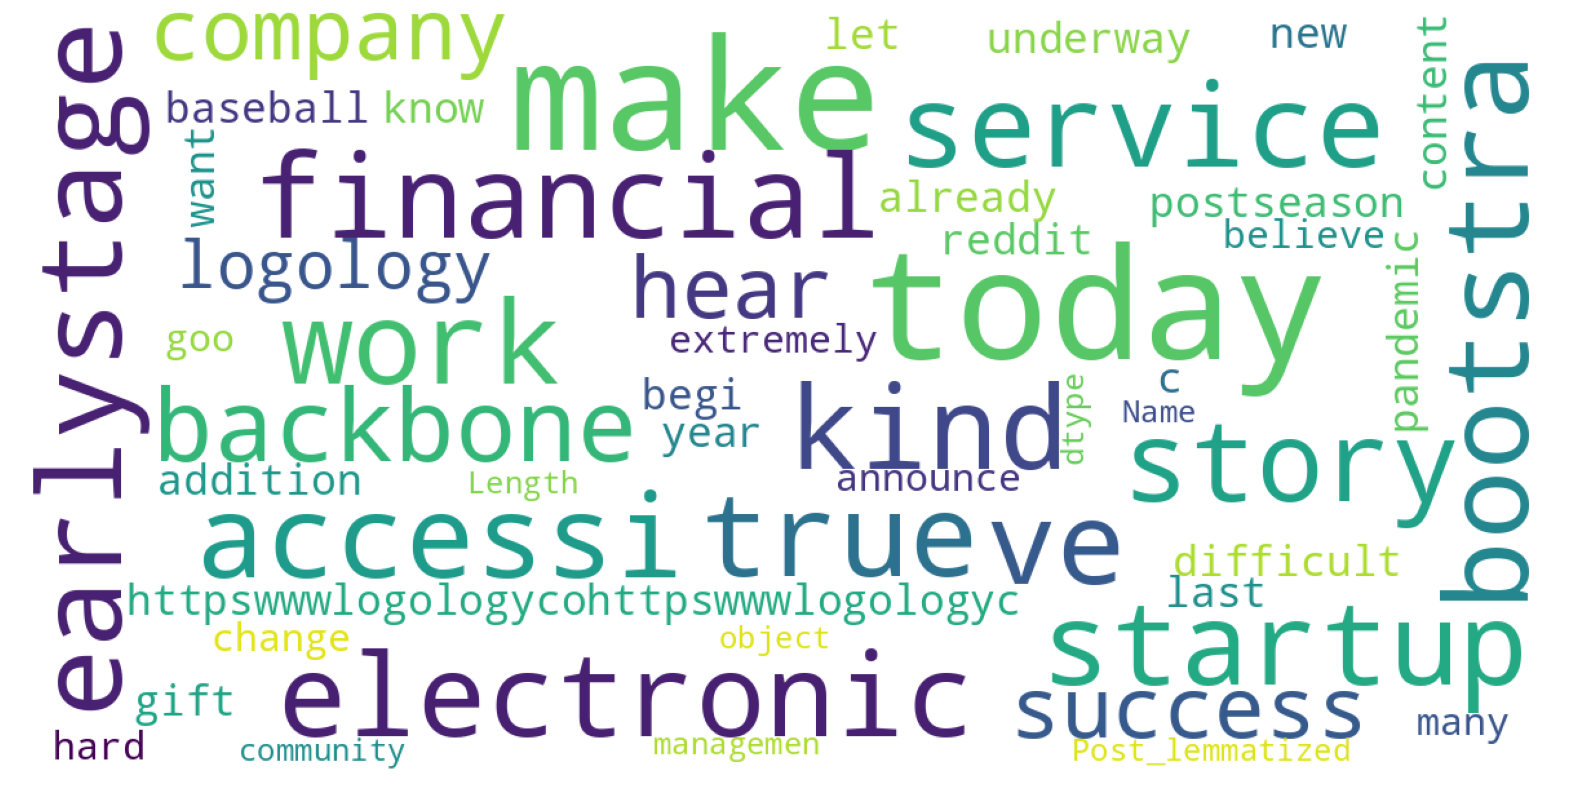

In [ ]:
# wordcloud function
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df['Post_lemmatized'])

In [ ]:
# Create a list of words for each topic
topic1_words = ' '.join(df.loc[df['Subreddit'] == 'family', 'Post_lemmatized'].apply(lambda x: ' '.join(x))).split()
topic2_words = ' '.join(df.loc[df['Subreddit'] == 'anime', 'Post_lemmatized'].apply(lambda x: ' '.join(x))).split()
topic3_words = ' '.join(df.loc[df['Subreddit'] == 'startup', 'Post_lemmatized'].apply(lambda x: ' '.join(x))).split()
topic4_words = ' '.join(df.loc[df['Subreddit'] == 'books', 'Post_lemmatized'].apply(lambda x: ' '.join(x))).split()


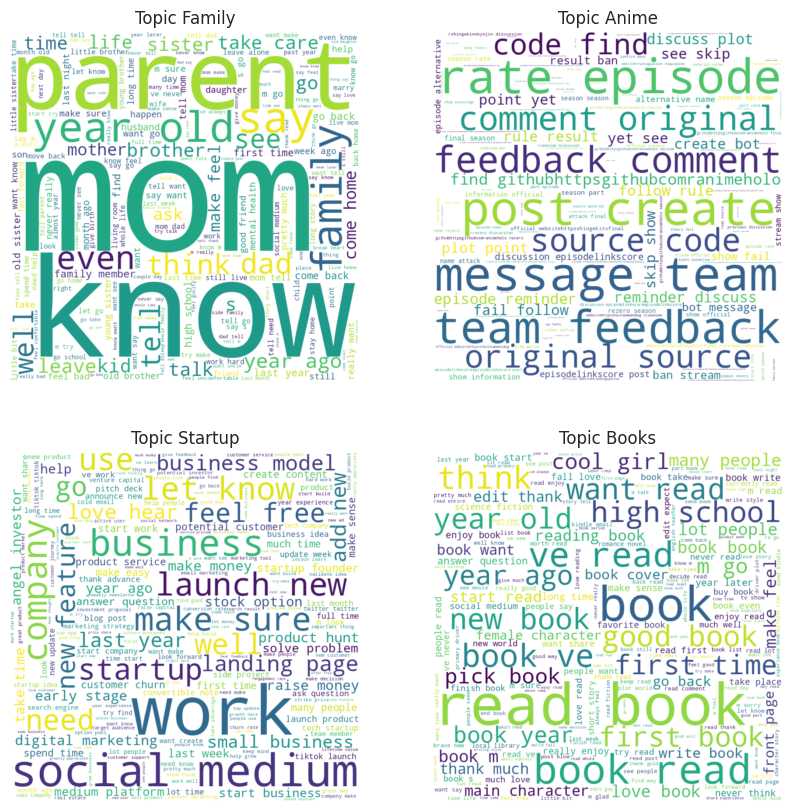

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# create word clouds for each topic
wordcloud1 = WordCloud(width=800, height=800, background_color='white').generate_from_text(' '.join(topic1_words))
wordcloud2 = WordCloud(width=800, height=800, background_color='white').generate_from_text(' '.join(topic2_words))
wordcloud3 = WordCloud(width=800, height=800, background_color='white').generate_from_text(' '.join(topic3_words))
wordcloud4 = WordCloud(width=800, height=800, background_color='white').generate_from_text(' '.join(topic4_words))


# plot the word clouds
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs[0, 0].imshow(wordcloud1, interpolation='bilinear')
axs[0, 0].set_title('Topic Family')
axs[0, 0].axis('off')

axs[0, 1].imshow(wordcloud2, interpolation='bilinear')
axs[0, 1].set_title('Topic Anime')
axs[0, 1].axis('off')

axs[1, 0].imshow(wordcloud3, interpolation='bilinear')
axs[1, 0].set_title('Topic Startup')
axs[1, 0].axis('off')

axs[1, 1].imshow(wordcloud4, interpolation='bilinear')
axs[1, 1].set_title('Topic Books')
axs[1, 1].axis('off')

# add more subplots for other topics

plt.show()


In [ ]:

# save the dataframe as a CSV file
df.to_csv('Clean_Data_NLP.csv', index=False)